# Derivation of non-centered D3DX3 scheme

The non-centere version is used when the processors is at the outer x boundary

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, together, as_finite_diff, simplify
from sympy import Function, Eq, S

init_printing()

In [2]:
x = symbols('x')
h = symbols('h', positive=True)

f = Function('f')

# Stencils
stencil = [x-3*h, x-2*h, x-h, x, x+h]

We are here discretizing the equation

$$ \partial_\rho^3 f$$

### Calculate the finite difference approximation of $\partial_x^3 f$

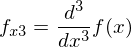

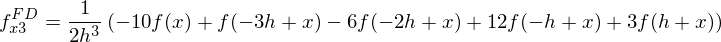

In [3]:
fx3 = f(x).diff(x,3)
fx3FD = as_finite_diff(fx3, stencil)
display(Eq(symbols('f_x3'), fx3))
display(Eq(symbols('f^FD_x3'), together(fx3FD)))

# Calculating the order

Let's call the Taylor expansions of $f$ for $T[f(x,a)] = \sum_{n=0}^\infty\frac{f^{(n)}(a)}{n!}(x-a)^n$

In [4]:
x0 = symbols('x0')
terms = 7

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x_0$, so that $T[f(x \to x_0,a \to x_0)]$

In [5]:
F = f(x).series(x, x0=x0, n=terms)
F = F.subs(x-x0,0)
display(Eq(symbols('F'),F))

Taylor expasion of $f$ evaluated in $x_0 + h$ expanded around $x_0$, so that $T[f(x \to x_0, a \to x_0+h)]$

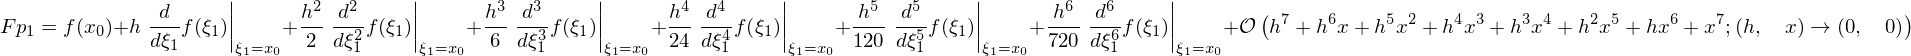

In [6]:
Fp1 = f(x+h).series(x+h, x0=x0, n=terms)
Fp1 = Fp1.subs(x-x0,0)
display(Eq(symbols('Fp1'),Fp1))

Taylor expasion of $f$ evaluated in $x_0-h$ expanded around $x_0$, so that $T[f(x \to x_0, a \to x_0-h)]$

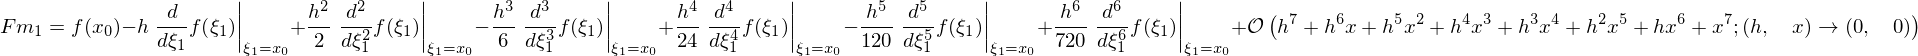

In [7]:
Fm1 = f(x-h).series(x-h, x0=x0, n=terms)
Fm1 = Fm1.subs(x-x0,0)
display(Eq(symbols('Fm1'),Fm1))

Taylor expasion of $f$ evaluated in $x_0-2h$ expanded around $x_0$, so that $T[f(x \to x_0, a \to x_0-2h)]$

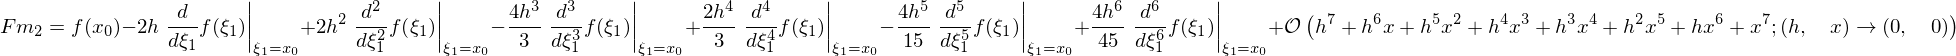

In [8]:
Fm2 = f(x-2*h).series(x-2*h, x0=x0, n=terms)
Fm2 = Fm2.subs(x-x0,0)
display(Eq(symbols('Fm2'),Fm2))

Taylor expasion of $f$ evaluated in $x_0-3h$ expanded around $x_0$, so that $T[f(x \to x_0, a \to x_0-3h)]$

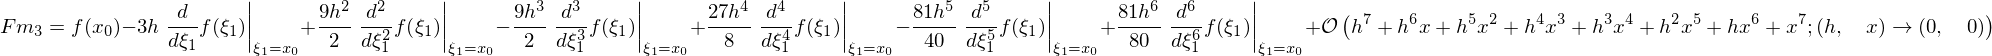

In [9]:
Fm3 = f(x-3*h).series(x-3*h, x0=x0, n=terms)
Fm3 = Fm3.subs(x-x0,0)
display(Eq(symbols('Fm3'),Fm3))

Substitute into the FD scheme

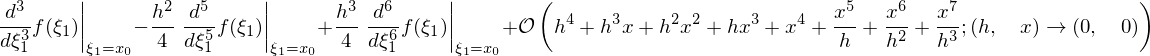

In [10]:
fx3FDT = fx3FD.subs([(f(x+h)  , Fp1),
                     (f(x)    , F  ),
                     (f(x-h)  , Fm1),
                     (f(x-2*h), Fm2),
                     (f(x-3*h), Fm3),
                    ])
display(simplify(fx3FDT))

Thus, we see that this discretization is second order.

# Investigation of what happens when one extrapolates to the last point

## 4th order approximation

From [ghost4thOrder](../../boundaryPolynomial/ghost4thOrder.ipynb), we have that

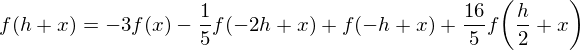

In [11]:
fp1=(S(16)/5*f(x+h/2)-3*f(x)+f(x-h)-f(x-2*h)/5)
display(Eq(f(x+h), fp1))

This gives

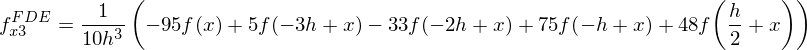

In [12]:
fx3FDE = fx3FD.subs(f(x+h), fp1)
display(Eq(symbols('f^FDE_x3'), together(fx3FDE)))

Taylor expasion of $f$ evaluated in $x_0+\frac{h}{2}$ expanded around $x_0$, so that $T\left[f\left(x \to x_0, a \to x_0+\frac{h}{2}\right)\right]$

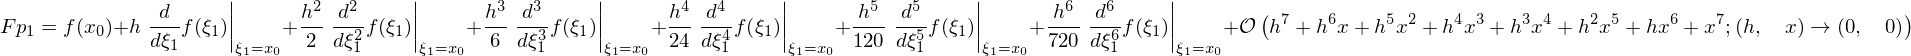

In [13]:
Fp05 = f(x+h/2).series(x+h/2, x0=x0, n=terms)
Fp05 = Fp05.subs(x-x0,0)
display(Eq(symbols('Fp1'),Fp1))

Substitute the taylor expansions

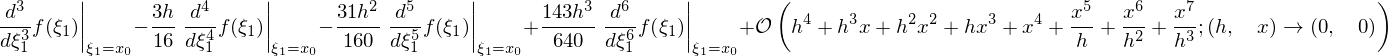

In [14]:
fx3FDET = fx3FDE.subs([(f(x+h)  , Fp1 ),
                       (f(x+h/2), Fp05),
                       (f(x)    , F   ),
                       (f(x-h)  , Fm1 ),
                       (f(x-2*h), Fm2 ),
                       (f(x-3*h), Fm3 ),
                     ])
display(simplify(fx3FDET))

This scheme seems to be only first order convergent.